In [1]:
# Файл с оттоком клиентов
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
# переименовываю переменные, приведя их к более "стандартному" и удобному виду;
churn = churn_data.rename(
    columns={
        'RowNumber': 'number',
        'CustomerId': 'Customer_Id',
        'Geography': 'country',
        'Gender': 'sex',
        'NumOfProducts': 'count_product',
        'HasCrCard': 'cr_card',
        'IsActiveMember': 'active',
        'EstimatedSalary': 'salary',
    }
).rename(
    columns=lambda colname: colname.lower()
)
churn.head()

,number,customer_id,surname,creditscore,country,sex,age,tenure,balance,count_product,cr_card,active,salary,exited,leave,creditscorecat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,exited,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,loyal,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,exited,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,loyal,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,loyal,Excellent


#### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

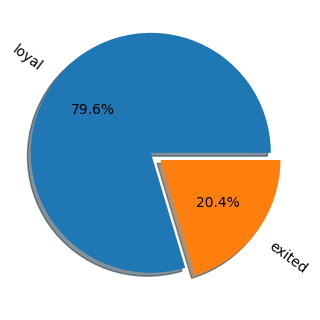

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
def get_leave(exited):
    if exited == 0:
        return 'loyal'
    else: 
        return 'leave'
churn_data['exited_full'] = churn_data['exited'].apply(get_leave)

churn_combinations = churn_data['leave'].value_counts()
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_combinations,
    labels = churn_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0],
    shadow = True,
    rotatelabels = True
)
plt.show()
#Вывод - процент ливнувших 

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

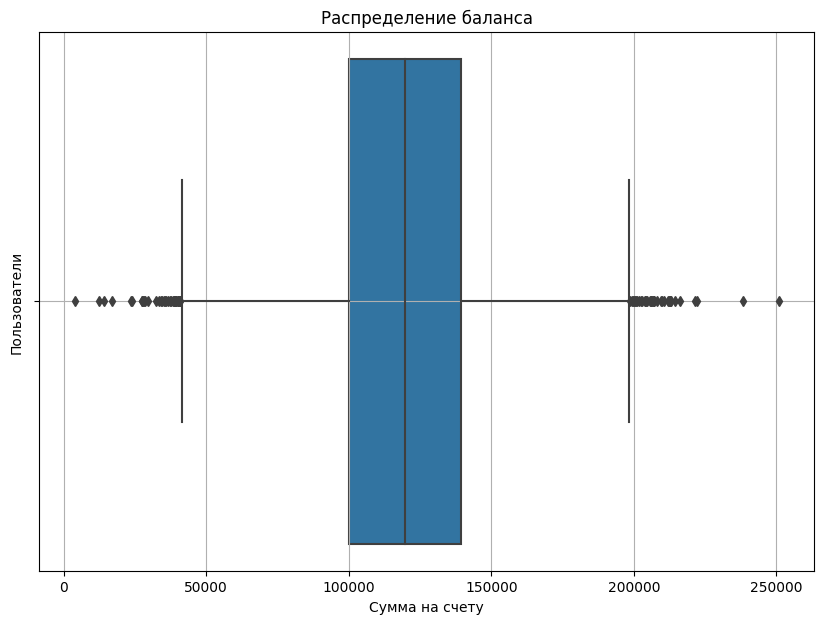

In [3]:
import seaborn as sns

mask = churn_data['Balance'] > 2500

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data= churn_data[mask],
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса');
boxplot.set_xlabel('Сумма на счету');
boxplot.set_ylabel('Пользователи')
boxplot.grid()
plt.show()



# 25% квнтиль равняется 100000$
# 75% квартиль, соответственно, 140000-145000$.
# Медиана (второй квантиль) равен 120000$
# Статистически значимые показатели: -1,5 квантиль = 45000$, 1,5 квантиль = 198000$
# Tочки до 45000$ и помле 198000 — выбросы. Статистического значения они не имеют, при желании от них можно избавится, чтобы не влияли на обучение модели.


### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

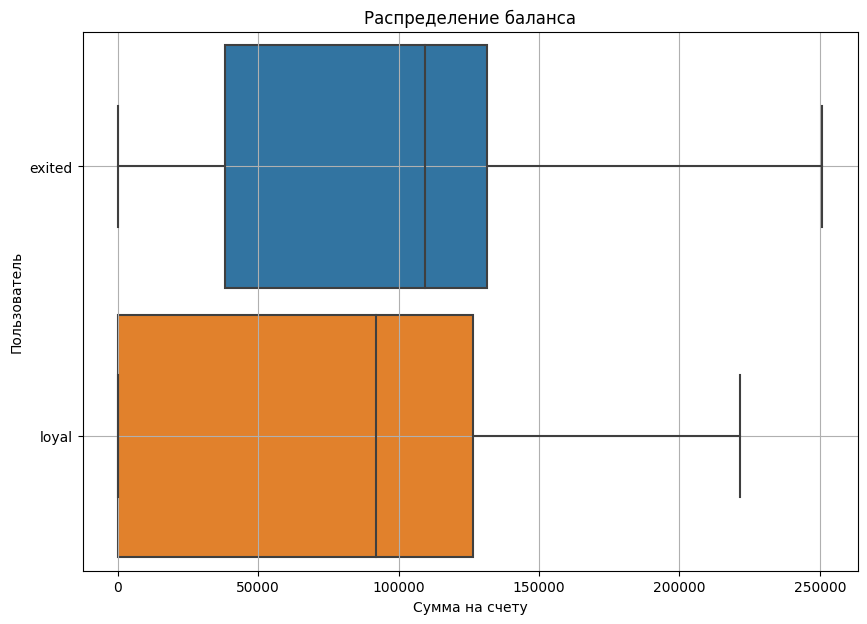

In [4]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='leave',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса');
boxplot.set_xlabel('Сумма на счету');
boxplot.set_ylabel('Пользователь');
boxplot.grid()

In [5]:
churn_data['leave'].value_counts()#сколько ливнувших, сколько осташихся
mask2 = churn_data['Exited'] == 1
a = churn_data[churn_data['Balance'] == 0], [mask2] #Балик = 0 у оставшихся

# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

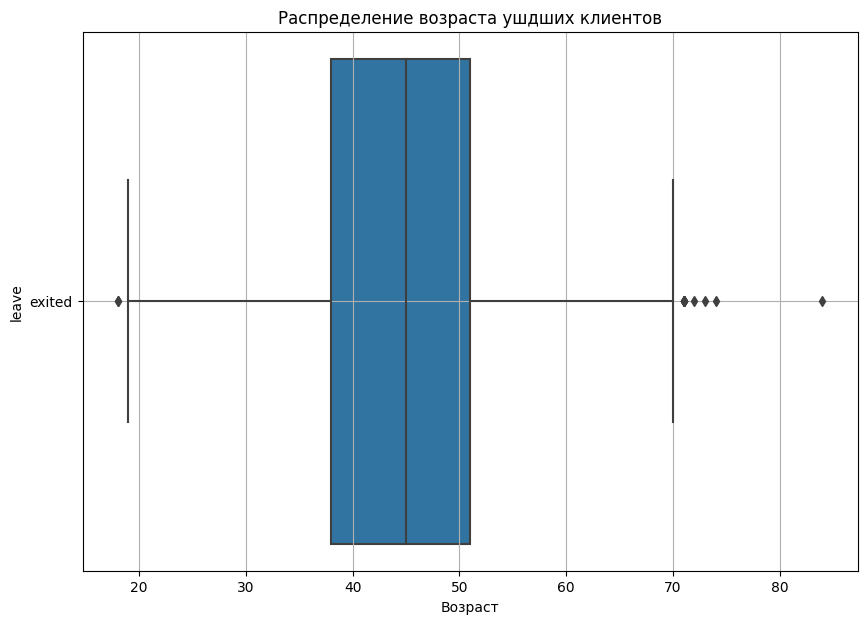

In [6]:
mask3 = churn_data['leave'] == 'exited'

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data[mask3],
    y='leave',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста ушдших клиентов');
boxplot.set_xlabel('Возраст');
boxplot.grid()

In [7]:
churn_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,leave
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,loyal
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,loyal
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,exited
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,loyal


# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [8]:
churn_data['CreditScore'].min()
churn_data['CreditScore'].max()

850

In [9]:
churn_data['EstimatedSalary'].min()
churn_data['EstimatedSalary'].max()

199992.48

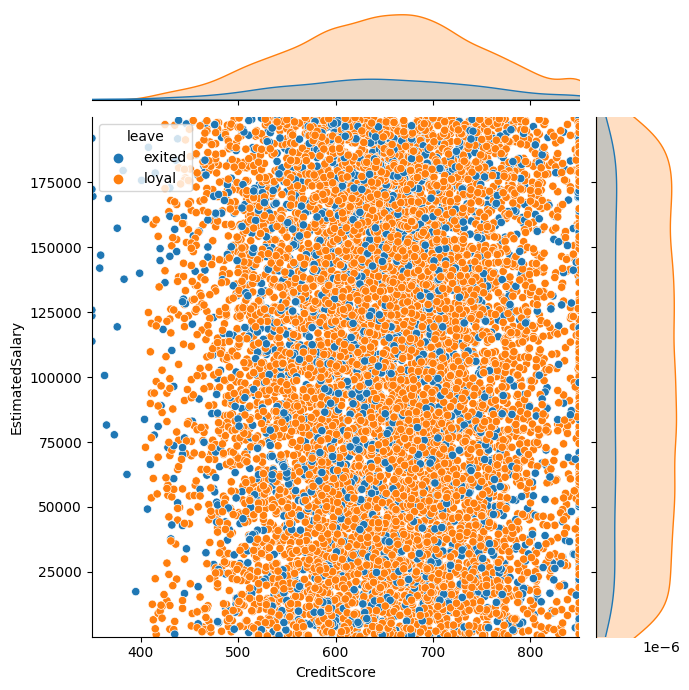

In [10]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue = 'leave',
    xlim = (350, 850),
    ylim = (11, 199993),
    height=7,
)

# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.


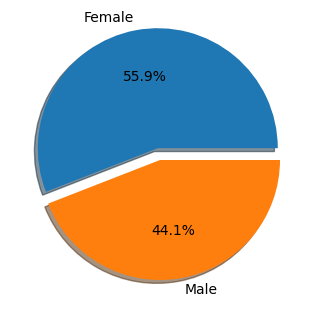

In [11]:
mask4 = churn_data['leave'] == 'exited'
churn_combinations2 = churn_data[mask4]['Gender'].value_counts()
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_combinations2,
    labels = churn_combinations2.index,
    autopct='%.1f%%',
    explode = [0.1, 0],
    shadow = True
)
plt.show()

# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [72]:
import plotly.express as px
# color — группирующий признак, в соответствии с которым будут раскрашены столбцы диаграммы;
# text — текст, который будет подписан на столбцах диаграммы;
# orientation — ориентация графика ('v' — вертикальная, 'h' — горизонтальная).
#строим график
bar_data = churn_data.groupby(
    by='NumOfProducts',
    as_index=False
)[['Exited']].sum()
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x= 'NumOfProducts', #ось x
    y= "Exited", #ось y
    color='NumOfProducts', 
    text = "Exited", #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Зависимость оттока клиентов от количества преобретенных услуг' #заголовок
)

#отображаем 
fig.show()

In [13]:
bar_data2 = churn_data.groupby(
    by='NumOfProducts',
    as_index=False
)[['Exited']].count()
fig = px.bar(
    data_frame=bar_data2, #датафрейм
    x= 'NumOfProducts', #ось x
    y= "Exited", #ось y
    color='NumOfProducts', 
    text = "Exited", #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Зависимость оттока клиентов от количества преобретенных услуг' #заголовок
)
fig.show()

0     27.714398
1      7.581699
2     82.706767
3    100.000000
Name: Exited, dtype: float64

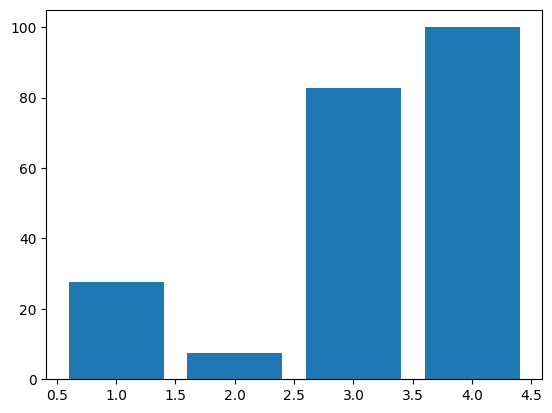

In [14]:
bar_data = churn_data.groupby(
    by='NumOfProducts',
    as_index=False
)[['Exited']].sum()

bar_data2 = churn_data.groupby(
    by='NumOfProducts',
    as_index=False
)[['Exited']].count()

c = bar_data['Exited'] / bar_data2['Exited'] * 100
display(c)

names = [1, 2, 3, 4]
values = c 
plt.bar(names, values)
plt.show()

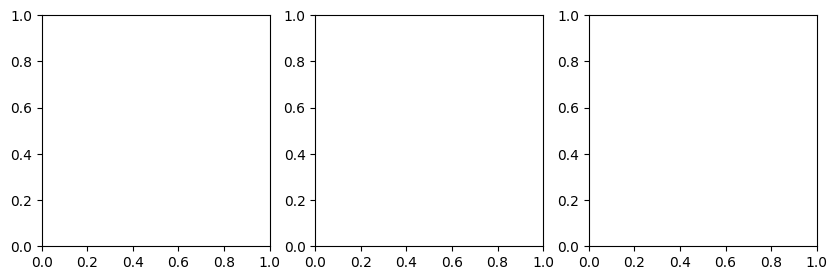

In [76]:
import plotly.express as px
deltas = ['bar_data2', 'recovered_delta', 'bar_data']
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

for index in range(3):
    varname = deltas[index]
    if index == 0:
        bar_data2 = churn_data.groupby(
        by='NumOfProducts',
        as_index=False
        )[['Exited']].count()
        
        fig = px.bar(
        data_frame=bar_data2, #датафрейм
        x= 'NumOfProducts', #ось x
        y= "Exited", #ось y
        color='NumOfProducts', 
        text = "Exited", #текст на столбцах
        orientation='v', #ориентация графика
        height=500, #высота
        width=1000, #ширина
        title='Зависимость оттока клиентов от количества преобретенных услуг' #заголовок
)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (16,).

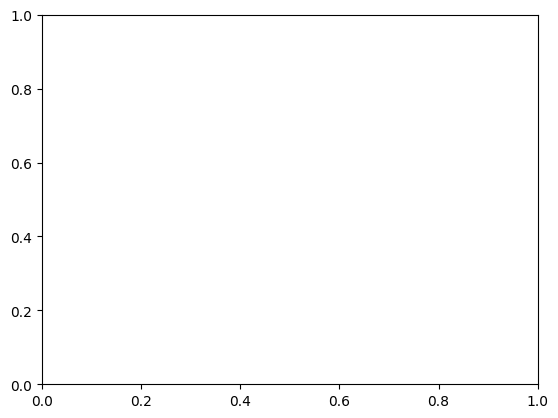

In [70]:

x = range(churn_data['NumOfProducts'].nunique())
y1 = churn_data[churn_data['leave'] == 'exited'].count()
y2 = churn_data[churn_data['leave'] == 'loyal'].count()

fig, ax = plt.subplots()

ax.bar(x, y1)
ax.bar(x, y2)

ax.set_facecolor('seashell')
fig.set_figwidth(8)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

In [69]:
y1 = churn_data[churn_data['leave'] == 'exited'],['NumOfProducts']
display(y1)

(      RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
 0             1    15634602     Hargrave          619    France  Female   42   
 2             3    15619304         Onio          502    France  Female   42   
 5             6    15574012          Chu          645     Spain    Male   44   
 7             8    15656148       Obinna          376   Germany  Female   29   
 16           17    15737452        Romeo          653   Germany    Male   58   
 ...         ...         ...          ...          ...       ...     ...  ...   
 9981       9982    15672754     Burbidge          498   Germany    Male   42   
 9982       9983    15768163      Griffin          655   Germany  Female   46   
 9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
 9997       9998    15584532          Liu          709    France  Female   36   
 9998       9999    15682355    Sabbatini          772   Germany    Male   42   
 
       Tenure    Balance  

# Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

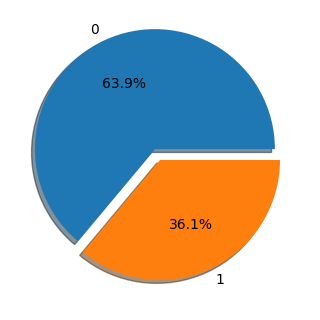

In [15]:
mask4 = churn_data['leave'] == 'exited'
combinations = churn_data[mask4]['IsActiveMember'].value_counts()
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    combinations,
    labels = combinations(''),
    autopct='%.1f%%',
    explode = [0.1, 0],
    shadow = True
)
plt.show()

# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.


In [16]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,leave
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,loyal
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,loyal
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,loyal


In [17]:
bar_data3 = churn_data.groupby(
    by='Geography',
    as_index=False
)[['Exited']].sum()

#строим график
fig = px.choropleth(
    data_frame=bar_data3, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color = 'Exited', #от чего зависит цвет
    range_color=[0, 1000], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='ylorrd' #палитра цветов
)

#отображаем график
fig.show()

Text(0.5, 1.0, 'Доля ушедших клиентов относительно кредитного рейтинга и количества лет пользования услугами банка')

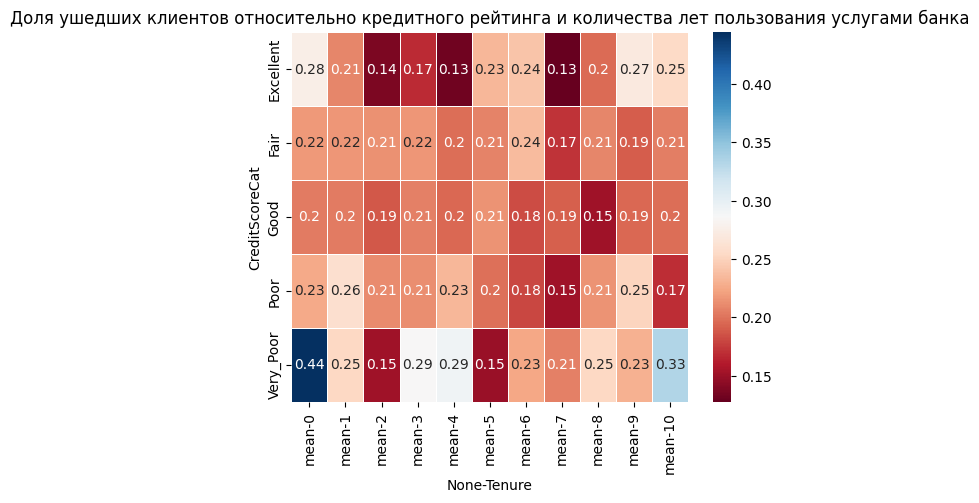

In [54]:
#преобразование столбцов к типу данных category

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data["CreditScoreCat"]=churn_data["CreditScore"].apply(lambda x: get_credit_score_cat(x))

pivot = churn_data.pivot_table(
    values= 'Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc=['mean'],
)

heatmap = sns.heatmap(pivot, linewidths=.5, cmap= 'RdBu', annot=True)
heatmap.set_title('Доля ушедших клиентов относительно кредитного рейтинга и количества лет пользования услугами банка')
